<span style='background:yellow'> <span style='font-family:Georgia'>  ## Load necessary packages  </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


<span style='background:yellow'> <span style='font-family:Georgia'>  ## Read the data  </span>

In [2]:
df = pd.read_csv('C:/Users/eymoo/Documents/Recommendation/ratings_Electronics (1).csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
len(df)

7824482

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Data is too big (7.8MM).. we will use 2% due to memory issue  </span> 

In [4]:
sampled = df.sample(frac=0.002, replace=True, random_state=1)
sampled.columns = ['userId', 'productId','rating','timestamp']
sampled.head(6)

,userId,productId,rating,timestamp
4322341,A2NAUP5YWC456C,B004OFPFVQ,5.0,1325289600
4686059,A105S56ODHGJEK,B0054CFKQI,5.0,1316476800
6762380,A3FU5IXOUUW0GR,B009WU5XUG,4.0,1376006400
3937352,AP5MLYKGVKA5M,B0047XRVWQ,5.0,1398556800
491263,A187PVL5FKH48Z,B0002L5R78,5.0,1327708800
5030793,A265IEMG2K5R4W,B005JXAEGS,4.0,1320710400


<span style='background:yellow'> <span style='font-family:Georgia'>  ## Let's take a look at the distribution  </span> 

In [5]:
#original one
df.nunique()

userId       4201696
productId     476002
rating             5
timestamp       5489
dtype: int64

In [6]:
#sampled one
sampled.nunique()

userId       15570
productId    11721
rating           5
timestamp     2793
dtype: int64

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Quick Visualization of sampled distribution and total distribution </span> 

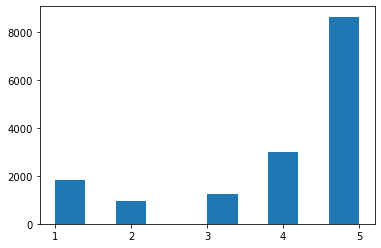

In [60]:
from pylab import hist, show,xticks

hist(sampled['rating'])
xticks(range(1, 6))
show()

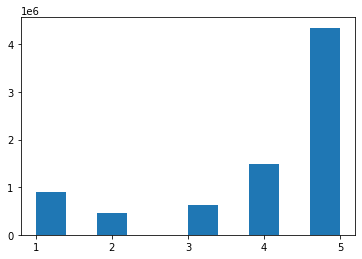

In [61]:
hist(df['rating'])
xticks(range(1, 6))
show()

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Distribution in terms of rating per user  </span> 

In [62]:
countd_sampled=sampled['userId'].value_counts()
countd=df['userId'].value_counts()

In [66]:
countd

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A3JWPJ74H0WMKA      1
A3UU5MOVL9VGF4      1
A39EPJTOJ0UJGD      1
AH24KLO6GQ1FY       1
ATDLRDVBTWXSN       1
Name: userId, Length: 4201696, dtype: int64

In [67]:
countd_sampled

AYB4ELCS5AM8P     3
A1AVTWQT4YOGH0    2
AV1BBZDIDG5BV     2
A1M66K0VT4JDS0    2
AEDKYXS0NYSY5     2
                 ..
APD8NE5TAHDD6     1
A2ZDVTGD1GP16C    1
A3G11WF34W2IN2    1
A22YPCVOTIBD4T    1
AVF6LZSV1HR9H     1
Name: userId, Length: 15570, dtype: int64

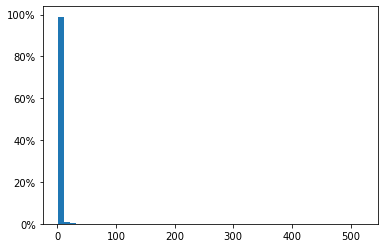

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.hist(countd, weights=np.ones(len(countd)) / len(countd), bins=50)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

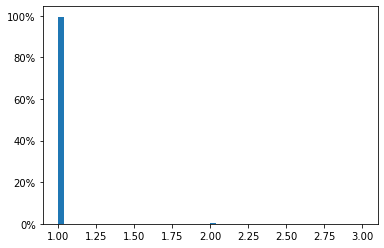

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.hist(countd_sampled, weights=np.ones(len(countd_sampled)) / len(countd_sampled), bins=50)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

<span style='background:yellow'> <span style='font-family:Georgia'>  ## 90% of users in sample data gave 1 rating only, which makes the data too sparse. But we will go ahead and use it
<br> Using Simple SVD model 
</span> 

In [14]:
#Load the packages

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering, NormalPredictor, KNNBaseline, BaselineOnly, CoClustering

<span style='background:yellow'> <span style='font-family:Georgia'>  
Surprise package needs to be fed with 3 inputs. 1) User 2) Product 3) Review. 
<br>
For the review we have to specify the min and max value of the raw data in the reader class.  </span> 

In [15]:
sampled['rating'].min(), sampled['rating'].max()

(1.0, 5.0)

In [16]:
# our rating scale start from 1 and end at 5. so rating_scale = (1,5)
reader = Reader(rating_scale=(1, 5))

# Load the data
data = Dataset.load_from_df(sampled[['userId','productId','rating']], reader)

In [17]:
# Let's Run SVD 
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


{'test_rmse': array([1.36666238, 1.38493834, 1.39337771]),
 'test_mae': array([1.08618673, 1.10510914, 1.10665773]),
 'fit_time': (0.42308712005615234, 0.3851175308227539, 0.40805912017822266),
 'test_time': (0.03126835823059082, 0.09376692771911621, 0.03400063514709473)}

In [50]:
#If a full cross-validation procedure is not needed, we can use the train_test_split() to sample a trainset and a testset 
# with given sizes, and use the accuracy metric of our choice.
#fit() : train the algorithm on the trainset, 
#test() : return the predictions made from the testset:

from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.3825


1.382525660166439

In [19]:
# Let's try to feed all the algorithms available and see which one performs well

In [20]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation (Feed algorithm above, data above. We will use RMSE for measurement)
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
t=pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [21]:
t.sort_values('test_rmse')

#SVDpp is the winner - SVDpp takes into account implicit interactions like above as well. 

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,1.377803,1.095880,1.059564,0.034984
KNNBaseline,1.378202,1.095874,2.432896,0.031995
BaselineOnly,1.378851,1.097196,0.050977,0.030989
SVD,1.379675,1.097729,0.734374,0.034712
CoClustering,1.387084,1.102525,1.994677,0.066081
KNNWithMeans,1.387436,1.103432,2.505972,0.041654
KNNBasic,1.387747,1.103736,2.336442,0.095003
SlopeOne,1.387864,1.103250,1.541768,0.040649
KNNWithZScore,1.387890,1.103885,2.965362,0.051003


In [ ]:
*Collaborative Filtering*

A method to predict a rating for a user item pair based on the history of ratings given by the user and given to the item. 
Most CF algorithms are based on user-item rating matrix where each row represents a user, each column an item. 
The entries of this matrix are ratings given by users to items.


#Singular Value Decomposition:


The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used for a dimensionality reduction technique. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the dimension

It uses a matrix structure where each row represents a user, and each column represents an item. 
The elements of this matrix are the ratings that are given to items by users.

The factorisation of this matrix is done by the singular value decomposition. 
It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. 
The singular value decomposition is a method of decomposing a matrix into three other matrices as given below: 
    Where A is a m x n utility matrix, 
    U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors, 
    S is a r x r diagonal matrix, which describes the strength of each latent factor and 
    V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors. 
    The latent factors here are the characteristics of the items, for example, the genre of the music. 
    The SVD decreases the dimension of the utility matrix A by extracting its latent factors. 
    It maps each user and each item into a r-dimensional latent space. 
    This mapping facilitates a clear representation of relationships between users and items. 
    

#SVD++ :
Modern day recommender systems should exploit all available interactions both explicit (e.g. numerical ratings) 
and implicit (e.g. likes, purchases, skipped, bookmarked). 
To this end SVD++ was designed to take into account implicit interactions like above as well. 


#Slope One
While collaborative filtering usually calculate the similarity between vectors of items using the cosine/Pearson methods, 
the Slope One approach recommends items to users based on the average difference in preferences of items. 

The main idea of the algorithm is to create a linear relation between items preferences. 
Such as the relation F(x) = x + b. The name "Slope One" cames from the fact that here the "x" is multiplied by "1".

It basically calculates the difference between the ratings of items for each user (for every item the user has rated). 
Then, it creates and average difference (diff) for every pair of items. 
To make a prediction of the Item A for an User 1: 
    -it would get the ratings that User 1 has given to other items 
    and add to it the difference (diff) between each item. With this we could obtain an average.

Being R1B the rating that user 1 has given to item B, 
DiffAB the difference between ratings of item A and B, and supposing we have 10 items:


Prediction(Item A) for User 1  = ((R1B + DiffAB) + (R1C + DiffAC) + ... (R1J + DiffAJ))/ 10

e.g.)
![image.png](attachment:image.png)

#NMF (Non-negative Matrix Factorization)

NMF are similar to SVD except that we now have additional constrains for U > 0 and V > 0. 
It requires all elements in the user-factor and item-factor matrix to be always positive.

![image-2.png](attachment:image-2.png)


#KNNBasic - A basic collaborative filtering algorithm
#KNNWithMeans - taking into account the mean ratings of each user
#KNNwithZscore - taking into account the z-score normalization of each user.

#Coclustering : Clusters are assigned using a straightforward optimization method, much like k-means

Basically, users and items are assigned some clusters Cu, Ci, and some co-clusters Cui.
The prediction r^ui is set as:

rui=Cui + (μu − Cu) + (μi − Ci)
where Cui is the average rating of co-cluster Cui, 
Cu is the average rating of u’s cluster, 
Ci is the average rating of i’s cluster. 

#baseline : to minimize the following regularized squared error to get bu and bi

      ∑          (rui−(μ+bu+bi))2+λ(b2u+b2i).
  
rui∈Rtrain

μ= average rating
bu = user bias
bi = item bias


In [ ]:
#Since SVD++ performs best, let's improve it a little bit more by finding out number of factors and RMSE for SVD++

In [27]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 50, 2):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [28]:
rmse=rmse_vs_factors(SVDpp,data)

In [29]:
#Plot it 

In [36]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,25)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 1 )
  plt.ylabel("Mean RMSE (cv=5)")
  plt.xticks(np.arange(0, 25, step=1))


  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.axvline(np.argmin(rmse), color = "r")

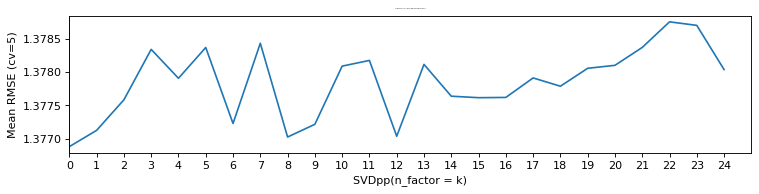

In [37]:
plot_rmse(rmse,"SVDpp")

In [ ]:
#According to the figure, there is an increasing trend of worse performance with higher k. 
#The lowest RMSE is achieved when k=8 but it is worth mentioning that k=12 is also very close to the RMSE achieved with only 4 latent factors. 
#Besides, the author argues that it is not probable that the user's taste (rating) is determined by such a low number of factors. 
#On the other hand, the result suggests a range of values which can be used in GridSearchCV()for parameter tunning.

In [ ]:
#Grid Search

In [38]:
param_grid = {'n_factors': [6,8,9,12]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.3779308666276702
{'n_factors': 6}


In [ ]:
# To make the model generalizable, i.e. avoid over and underfitting, the grid algorithm finds n_factors = 6 optimal.

In [ ]:
# Training SVD Algorithm and Predictions: https://www.jiristodulka.com/post/recsys_cf/

In [ ]:
# Comparing Historical data and Prediction

#Step1 :Map the predictions to each user.

#Step2 :Return: i.) recommendations for any given userId and ii.) the user's historical ratings 
# (From Surprise Official doc - Part I. comes from the official Surprise documentation. It maps the prediction to each user, sorts them in descending order, and returns the top n (by default 10) recommended movies for the userId specified as the argument of the function.) 

#Step3 :Return the above objects with specific reference in a readable format (i.e. tidy DataFrame)

In [77]:
# our rating scale start from 1 and end at 5. so rating_scale = (1,5)
reader = Reader(rating_scale=(1, 5))

# Load the data
data = Dataset.load_from_df(sampled[['userId','productId','rating']], reader)

In [78]:
algo_SVDpp = SVDpp(n_factors = 6)
algo_SVD.fit(trainset)

In [79]:
# Then predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [80]:
len(testset)

107063612

In [ ]:
# The test set got so big due to data sparcity but below code use Surprise built in top_n function and will return items real value vs predicted value

predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


In [ ]:
algo_SVDpp = SVDpp(n_factors = 6)
algo_SVD.fit(trainset)
# Then predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])    